# PROCESAMIENTO DE LOS DATOS DEL DATASET

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode

Importamos las columnas con Id's

In [2]:
provincias=pd.read_csv('./Database/Tablas_de_dimension/Provincias.csv',delimiter = ',',encoding = "utf-8")
partidos=pd.read_csv('./Database/Tablas_de_dimension/Partidos.csv',delimiter = ',',encoding = "utf-8")
localidades=pd.read_csv('./Database/Tablas_de_dimension/Localidades.csv',delimiter = ',',encoding = "utf-8")
tecnologias=pd.read_csv('./Database/Tablas_de_dimension/Tecnologias.csv',delimiter = ',',encoding = "utf-8")

In [3]:
def normalizacion_palabras(palabra_corregir):
    '''Saca las mayusculas y las tildes de una palabrade las palabras y pone la primera letra de cada palabra en mayúscula 
    (exceptuando las las palabras que conectan otras palabras como la, el, de, etc).'''
    excepciones = ["la", "el", "de", "y", "del", "los", "las", "en", "al", "por", "con", "a", "para"]
    # Convertimos la palabra a minúsculas para empezar desde una base común
    palabras = palabra_corregir.lower().split()
    
    # Corregimos las palabras y quitamos las tildes
    palabras_corregidas = []
    for i, palabra in enumerate(palabras):
        # Si la palabra está en la lista de excepciones, no la capitalizamos (a menos que sea la primera)
        if palabra in excepciones and i != 0:
            palabras_corregidas.append(palabra)
        else:
            # Capitalizamos la palabra
            palabra_corregida = palabra.capitalize()
            # Quitamos las tildes
            palabra_corregida = unidecode.unidecode(palabra_corregida)
            palabras_corregidas.append(palabra_corregida)
    
    # Volver a juntar las palabras
    palabras_corregidas = ' '.join(palabras_corregidas)
    
    return palabras_corregidas

Creamos los dataframes

In [4]:
acc_tec = pd.read_excel("./Database/internet.xlsx", sheet_name="Accesos Por Tecnología")
pen_pobl = pd.read_excel("./Database/internet.xlsx", sheet_name="Penetración-poblacion")
pen_hog = pd.read_excel("./Database/internet.xlsx", sheet_name="Penetracion-hogares")
pen_total = pd.read_excel("./Database/internet.xlsx", sheet_name="Penetracion-totales")
acc_total_rang = pd.read_excel("./Database/internet.xlsx", sheet_name="Totales Accesos por rango")
acc_rang = pd.read_excel("./Database/internet.xlsx", sheet_name="Accesos por rangos")
dial_baf_tot = pd.read_excel("./Database/internet.xlsx", sheet_name="Totales Dial-BAf")
dial_baf = pd.read_excel("./Database/internet.xlsx", sheet_name="Dial-BAf")
Ingresos  = pd.read_excel("./Database/internet.xlsx", sheet_name="Ingresos ")
acc_vel_sinrang = pd.read_excel("./Database/internet.xlsx", sheet_name="Acc_vel_loc_sinrangos")
vel_sinrang = pd.read_excel("./Database/internet.xlsx", sheet_name="Velocidad_sin_Rangos")
Acc_tec_loc = pd.read_excel("./Database/internet.xlsx", sheet_name="Accesos_tecnologia_localidad") 
vel_prov = pd.read_excel("./Database/internet.xlsx", sheet_name="Velocidad % por prov") 
vmd_tot = pd.read_excel("./Database/internet.xlsx", sheet_name="Totales VMD")
acc_total_tec = pd.read_excel("./Database/internet.xlsx", sheet_name="Totales Accesos Por Tecnología")
Ingresos_tel_fij = pd.read_excel("./Database/Complementarios/telefonia_fija.xlsx", sheet_name="Fija_ingresos")
Ingresos_tel_mov = pd.read_excel("./Database/Complementarios/telefonia_movil.xlsx", sheet_name="Ingresos")

<u>ACC_VEL_LOC_SINRANGOS</u>

El dataset "Acc_vel_loc_sinrangos" tiene las columnas con nombres incorrectos. hacemos el cambio:
- partido --> provincia
- localidad --> partido
- link indec --> localidad
- velocidad --> link indec
- provincia --> velocidad
- acceso --> acceso (esta no se cambia)

In [5]:
acc_vel_sinrang1=acc_vel_sinrang.copy()
acc_vel_sinrang1.head()

,Partido,Localidad,link Indec,Velocidad (Mbps),Provincia,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0


In [6]:
acc_vel_sinrang1=acc_vel_sinrang1.rename(columns={"Partido":"provincia",
                                                 "Localidad":"partido",
                                                 "link Indec":"localidad",
                                                 "Velocidad (Mbps)":"link Indec",
                                                 "Provincia":"velocidad"})

acc_vel_sinrang1=acc_vel_sinrang1.rename(columns={"provincia":"Provincia",
                                                 "partido":"Partido",
                                                 "localidad":"Localidad",
                                                 "velocidad":"Velocidad (Mbps)"})
acc_vel_sinrang1

,Provincia,Partido,Localidad,link Indec,Velocidad (Mbps),Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0
...,...,...,...,...,...,...
18859,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,100.00,5779.0
18860,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,300.00,4570.0
18861,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,500.00,442.0
18862,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,600.00,223.0


Ahora veamos el dataset en general

In [7]:
acc_vel_sinrang1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         18864 non-null  object 
 1   Partido           18864 non-null  object 
 2   Localidad         18863 non-null  object 
 3   link Indec        18864 non-null  object 
 4   Velocidad (Mbps)  18864 non-null  float64
 5   Accesos           18857 non-null  float64
dtypes: float64(2), object(4)
memory usage: 884.4+ KB


La columna "link indec" no tiene informacion reelevante, ya que es un link de internet asociado a una localidad. Por lo que se lo eliminará 

In [8]:
acc_vel_sinrang2=acc_vel_sinrang1.drop(columns="link Indec")

Convertimos la columnas que no tienen str's al tipo que deberían ser

In [9]:
acc_vel_sinrang2["Accesos"]=acc_vel_sinrang2["Accesos"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
acc_vel_sinrang2["Velocidad (Mbps)"]=acc_vel_sinrang2["Velocidad (Mbps)"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

Veamo que pasa con los valores vacíos de las distintas columnas. Primero analicemos la columna Acceso:

In [10]:
nan = acc_vel_sinrang2[acc_vel_sinrang2['Accesos'].isna()]
print(nan)

                 Provincia     Partido         Localidad  Velocidad (Mbps)  \
10510           CORRIENTES   Ituzaingó  Colonia Liebig's               0.0   
11288           ENTRE RIOS        Tala  Rosario del Tala               0.0   
14784                SALTA    Cafayate          Tolombón               0.0   
15288                SALTA  San Carlos           Animaná               0.0   
15294                SALTA  San Carlos        San Carlos               0.0   
17235             SANTA FE     Rosario     General Lagos               0.0   
18090  SANTIAGO DEL ESTERO       Choya             Frías               0.0   

       Accesos  
10510      NaN  
11288      NaN  
14784      NaN  
15288      NaN  
15294      NaN  
17235      NaN  
18090      NaN  


Vemos que los valores NaN de esta columna estan asociados a unos valores 0.0 en la velocidad, pero hay mas velores asi en la velocidad que tienen accesos no nulos. Por lo que los reemplazaremos los NaN de Accesos por ceros.

In [11]:
acc_vel_sinrang2["Accesos"]=acc_vel_sinrang2["Accesos"].fillna(0.0)

Veamos ahora que pasa con el NaN de la columna Localidad

In [12]:
nan = acc_vel_sinrang2[acc_vel_sinrang2['Localidad'].isna()]
print(nan)

     Provincia                          Partido Localidad  Velocidad (Mbps)  \
7172      CABA  Ciudad Autónoma de Buenos Aires       NaN             300.0   

      Accesos  
7172  -5582.0  


Para la Provincia CABA, tanto el partido, como la localidad son "Ciudad Autónoma de Buenos Aires". Eso nos lleva a pensar que este valor NaN es un error y debería tener el valor "Ciudad Autónoma de Buenos Aires".

In [13]:
acc_vel_sinrang2["Localidad"]=acc_vel_sinrang2["Localidad"].fillna("Ciudad Autónoma de Buenos Aires")

Veamos que pasa con los valores de velocidad=0

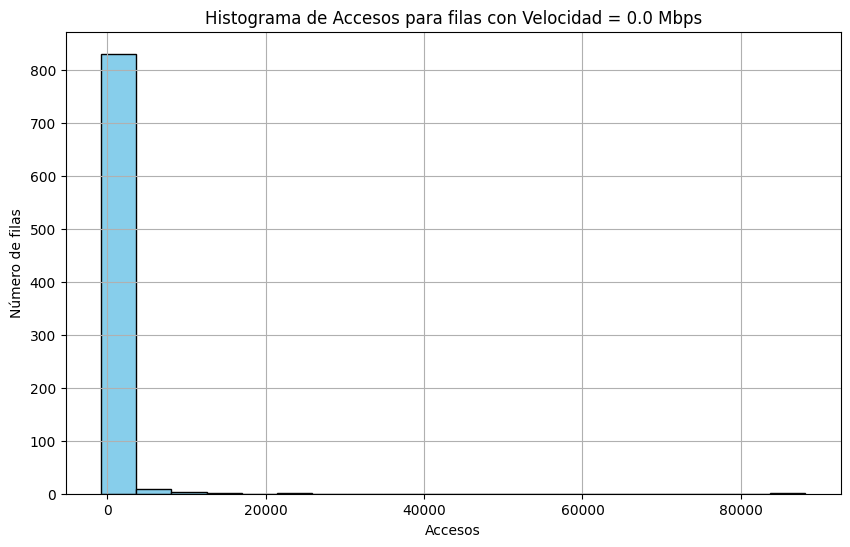

In [14]:
# Filtrar las filas donde la columna 'Velocidad (Mbps)' es igual a 0.0
df_zero_speed = acc_vel_sinrang2[acc_vel_sinrang2['Velocidad (Mbps)'] == 0.0]
#df_zero_speed = df_zero_speed[df_zero_speed['Accesos'] >1000]
# Crear un histograma con la columna 'Accesos' en el eje X
plt.figure(figsize=(10, 6))
plt.hist(df_zero_speed['Accesos'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Accesos para filas con Velocidad = 0.0 Mbps')
plt.xlabel('Accesos')
plt.ylabel('Número de filas')
plt.grid(True)
plt.show()

In [15]:
otros = acc_vel_sinrang2[acc_vel_sinrang2['Partido']=="Otros"]
print(otros)

              Provincia Partido Localidad  Velocidad (Mbps)  Accesos
7226               CABA   Otros     Otros               0.0   -590.0
7340          CATAMARCA   Otros     Otros               0.0      4.0
8042             CHUBUT   Otros     Otros               0.0    820.0
8937            CORDOBA   Otros     Otros               0.0    480.0
10597        CORRIENTES   Otros     Otros               0.0   -830.0
11093        ENTRE RIOS   Otros     Otros               0.0   7251.0
11536           FORMOSA   Otros     Otros               0.0     36.0
11861             JUJUY   Otros     Otros               0.0   1374.0
12699          LA RIOJA   Otros     Otros               0.0     -1.0
13166           MENDOZA   Otros     Otros               0.0   1709.0
14148           NEUQUEN   Otros     Otros               0.0   8221.0
14607         RIO NEGRO   Otros     Otros               0.0    408.0
15192             SALTA   Otros     Otros               0.0    185.0
15497          SAN JUAN   Otros   

Como podemos ver, las filas con velocidad=0 abarcar un rango muy amplio de números de Accesos, asi que, lo mas probable, es que esos valores 0 seas una forma de simbolizar la falta de información en la velocidad. Esto también explicaría el por qué todas las filas con Partido y Localidad con entrada "Otros", tienen velocidad 0.

También hay valores negativos en la columna Accesos

In [16]:
neg = acc_vel_sinrang2[acc_vel_sinrang2['Accesos']<0]
print(neg)

        Provincia                          Partido  \
7172         CABA  Ciudad Autónoma de Buenos Aires   
7226         CABA                            Otros   
10597  CORRIENTES                            Otros   
12699    LA RIOJA                            Otros   

                             Localidad  Velocidad (Mbps)  Accesos  
7172   Ciudad Autónoma de Buenos Aires             300.0  -5582.0  
7226                             Otros               0.0   -590.0  
10597                            Otros               0.0   -830.0  
12699                            Otros               0.0     -1.0  


El hecho de que el número de entradas con Accesos negativos sean tan pocos hace pensar en que pueden ser un error en el ingreso de datos. Por lo que se los cambiará de signo.

In [17]:
acc_vel_sinrang2.loc[acc_vel_sinrang2['Accesos'] < 0, 'Accesos'] = acc_vel_sinrang2['Accesos'].abs()

Ahora normalizamos el texto de las columnas Provinvia, Partido y Localidad

In [18]:
acc_vel_sinrang2.loc[:, "Partido"]=acc_vel_sinrang2["Partido"].apply(normalizacion_palabras)
acc_vel_sinrang2.loc[:, "Provincia"]=acc_vel_sinrang2["Provincia"].apply(normalizacion_palabras)
acc_vel_sinrang2.loc[:, "Localidad"]=acc_vel_sinrang2["Localidad"].apply(normalizacion_palabras)

In [19]:
acc_vel_sinrang2["Localidad"] = acc_vel_sinrang2["Localidad"].replace("Ciudad Autonoma de Buenos Aires", "Caba")
acc_vel_sinrang2["Partido"] = acc_vel_sinrang2["Partido"].replace("Ciudad Autonoma de Buenos Aires", "Caba")
acc_vel_sinrang2["Provincia"] = acc_vel_sinrang2["Provincia"].replace("Ciudad Autonoma de Buenos Aires", "Caba")

Veamos la distribucion de la columna Acceso para velocidades distintas de cero

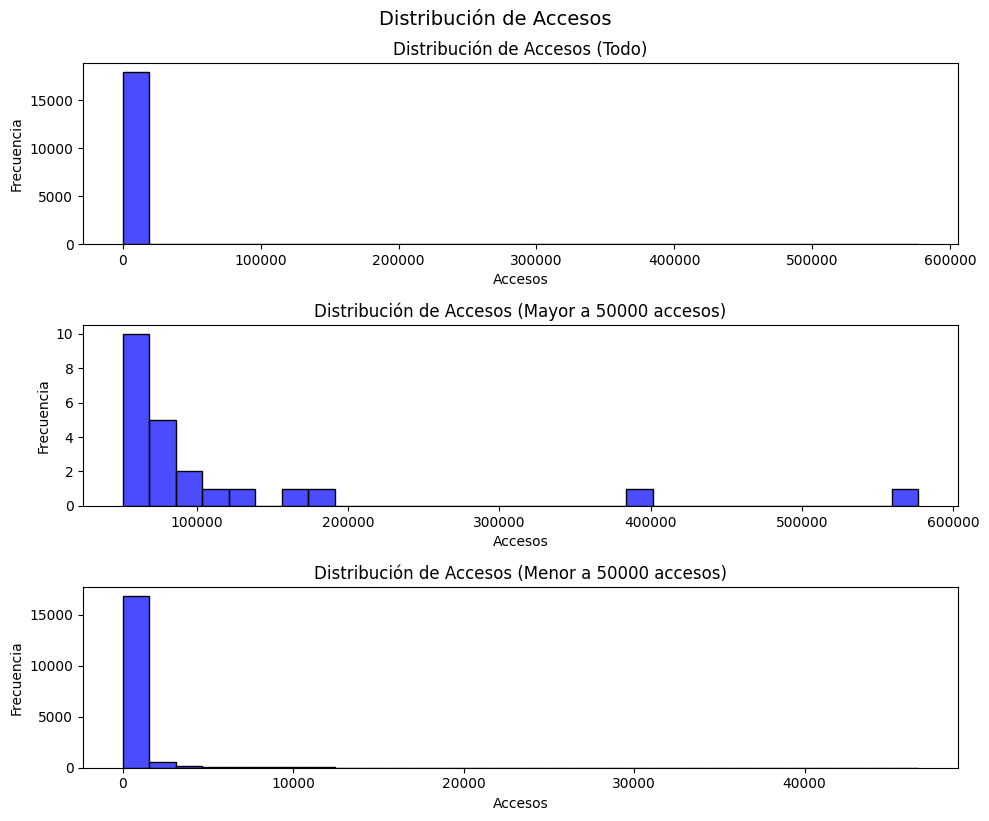

          Provincia             Partido                             Localidad  \
633    Buenos Aires        Bahia Blanca                          Bahia Blanca   
2433   Buenos Aires  General Pueyrredon                         Mar del Plata   
2435   Buenos Aires  General Pueyrredon                         Mar del Plata   
2437   Buenos Aires  General Pueyrredon                         Mar del Plata   
3657   Buenos Aires            La Plata                              La Plata   
3662   Buenos Aires            La Plata                              La Plata   
7196           Caba                Caba                                  Caba   
7199           Caba                Caba                                  Caba   
7206           Caba                Caba                                  Caba   
7210           Caba                Caba                                  Caba   
7217           Caba                Caba                                  Caba   
7220           Caba         

In [20]:
df = acc_vel_sinrang2[acc_vel_sinrang2['Velocidad (Mbps)'] != 0.0]
df1 = df[df['Accesos'] > 50000]
df2 = df[df['Accesos'] < 50000]
# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8), sharex=False)

sns.histplot(df['Accesos'], bins=30, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Distribución de Accesos (Todo)')
axes[0].set_xlabel('Accesos')
axes[0].set_ylabel('Frecuencia')

sns.histplot(df1['Accesos'], bins=30, ax=axes[1], color='blue', alpha=0.7)
axes[1].set_title('Distribución de Accesos (Mayor a 50000 accesos)')
axes[1].set_xlabel('Accesos')
axes[1].set_ylabel('Frecuencia')

sns.histplot(df2['Accesos'], bins=30, ax=axes[2], color='blue', alpha=0.7)
axes[2].set_title('Distribución de Accesos (Menor a 50000 accesos)')
axes[2].set_xlabel('Accesos')
axes[2].set_ylabel('Frecuencia')
#axes[1].set_xlim(0, 50)

plt.tight_layout()
plt.suptitle('Distribución de Accesos', fontsize=14, y=1.02)

plt.show()

print(df1)

Tienen sentido los accesos totales por encima de 50000, ya que estan localizadas en las localidades mas pobladas de la argentina. El top en población es 
1) Ciudad de Buenos Aires (incluye Caba)
2) Cordoba
3) Rosario
4) Mendoza
5) La Plata
6) San Miguel de Tucuman

Por lo que podemos concluir que, por más que son outliers, no tiene sentido eliminarlos ya que tienen sentido.

Ahrora queremos ver que velocidades de internet tienen los mayores accesos

In [21]:
# Suponiendo que tienes un DataFrame 'df' con las columnas 'Velocidad (Mbps)' y 'Accesos'
# Agrupar los datos por "Velocidad (Mbps)" y sumar los "Accesos"
df_agrupado = acc_vel_sinrang2.groupby('Velocidad (Mbps)')['Accesos'].sum().reset_index()

# Ordenar los resultados por la cantidad de accesos en orden descendente
df_sorted = df_agrupado.sort_values(by='Accesos', ascending=False)

# Mostrar las primeras filas con las mayores cantidades de accesos
top_velocidades = df_sorted[['Velocidad (Mbps)', 'Accesos']]

# Imprimir las primeras filas
top_velocidades_sin_cero=top_velocidades[top_velocidades["Velocidad (Mbps)"]>0]
print(top_velocidades_sin_cero.head(10).reset_index(drop=True))

   Velocidad (Mbps)    Accesos
0             300.0  2380674.0
1             100.0  2334841.0
2              50.0  1590798.0
3              30.0   994521.0
4              10.0   697905.0
5             150.0   507523.0
6               6.0   304032.0
7              20.0   287032.0
8              15.0   263774.0
9             500.0   257407.0


Cosa coherente, ya que 300 Mb/s es la velocidad de internet que tiene, en Caba (dentro de la Ciudad de Buenos Aires), mas de 500000 de accesos 

Traemos los Id's

In [22]:
acc_vel_sinrang2 = acc_vel_sinrang2.merge(provincias[["Provincia", "Id_Provincia"]], left_on="Provincia", right_on="Provincia", how="left")
acc_vel_sinrang2 = acc_vel_sinrang2.merge(partidos[["Partido", "Id_Partido"]], left_on="Partido", right_on="Partido", how="left")
acc_vel_sinrang2 = acc_vel_sinrang2.merge(localidades[["Localidad", "Id_Localidad"]], left_on="Localidad", right_on="Localidad", how="left")
acc_vel_sinrang3 = acc_vel_sinrang2.drop(columns=["Provincia","Partido","Localidad"])
acc_vel_sinrang3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Velocidad (Mbps)  18864 non-null  float64
 1   Accesos           18864 non-null  float64
 2   Id_Provincia      18864 non-null  int64  
 3   Id_Partido        18864 non-null  int64  
 4   Id_Localidad      18864 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 737.0 KB


In [23]:
acc_vel_sinrang3.to_csv('./Database/Tablas_de_hecho/Acc_vel_loc_sinrangos.csv',index=False, decimal=',')

<u>ACCESO POR TECNOLOGÍA</u>

In [24]:
acc_tec1=acc_tec.copy()
acc_tec1.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055,2722466,1849476,138638,64745,4989380
1,2024,2,Capital Federal,54102,1144781,230402,4493,29821,1463599
2,2024,2,Catamarca,4951,10303,58355,1384,81,75074
3,2024,2,Chaco,9448,57935,68944,8407,2358,147092
4,2024,2,Chubut,25955,80704,26516,31118,9930,174223


Veamos los valores NaN

In [25]:
acc_tec1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           1007 non-null   int64 
 1   Trimestre     1007 non-null   int64 
 2   Provincia     1007 non-null   object
 3   ADSL          1007 non-null   int64 
 4   Cablemodem    1007 non-null   int64 
 5   Fibra óptica  1007 non-null   int64 
 6   Wireless      1007 non-null   int64 
 7   Otros         1007 non-null   int64 
 8   Total         1007 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 70.9+ KB


In [26]:
acc_tec1=acc_tec1.rename(columns={"Trimestre":"Trimestre",
                        "ADSL":"Adsl",
                        "Fibra óptica":"Fibra Optica"})

Creamos una columna que tenga el número del año y el número del trimestre concatenado. Esta nos permitirá hacer lineas de tiempo en las cuales se separen los trimestres dentro de los años.

In [27]:
acc_tec1['Año-Trimestre'] = acc_tec1['Año'].astype(str) + acc_tec1['Trimestre'].astype(str)
acc_tec1['Año-Trimestre'] = acc_tec1['Año-Trimestre'].astype(int)

Creemos un dataframe con los porcentajes del total de accesos por provincia para cada tecnología (en el 2024)

In [28]:
# Supongamos que tu tabla se llama df
# Filtramos los datos por el año 2024
acc_tec1_2024 = acc_tec1[acc_tec1['Año'] == 2024]

# Agrupamos por provincia y sumamos los accesos de cada tecnología
accesos_2024 = acc_tec1_2024.groupby('Provincia')[['Adsl', 'Cablemodem', 'Fibra Optica', 'Wireless', 'Otros']].sum()
accesos_2024.reset_index(inplace=True)
# Calculamos el total de accesos por provincia
accesos_2024['TOTAL DE ACCESOS'] = accesos_2024[['Adsl', 'Cablemodem', 'Fibra Optica', 'Wireless', 'Otros']].sum(axis=1)

# Calculamos el porcentaje de cada tecnología con respecto al total
accesos_2024_porcentage = accesos_2024.copy()

# Dividimos cada columna de tecnología por el total de accesos y multiplicamos por 100
for tecnologia in ['Adsl', 'Cablemodem', 'Fibra Optica', 'Wireless', 'Otros']:
    accesos_2024_porcentage[tecnologia] = round((accesos_2024[tecnologia] / accesos_2024['TOTAL DE ACCESOS']) * 100,1)

# Ordenamos el dataframe por la columna 'TOTAL DE ACCESOS POR PROVINCIA' de mayor a menor
accesos_2024_porcentage = accesos_2024_porcentage.sort_values(by='TOTAL DE ACCESOS', ascending=False)

# Mostramos el nuevo dataframe con los porcentajes
print("Porcentajes del numero de accesos accesos totales para cada tecnologia, por provincia en el año 2024:","\n","\n")
accesos_2024_porcentage

# Calcular el total de accesos por tecnología en 'accesos_2024'
total_accesos = accesos_2024[['Adsl', 'Cablemodem', 'Fibra Optica', 'Wireless', 'Otros','TOTAL DE ACCESOS']].sum()

total_accesos_df=pd.DataFrame(total_accesos).T
total_accesos_df['Provincia']=["TOTAL DE ACCESOS"]
accesos_2024_porcentage_con_total = pd.concat([accesos_2024_porcentage, total_accesos_df], ignore_index=True)
accesos_2024_porcentage_con_total

Porcentajes del numero de accesos accesos totales para cada tecnologia, por provincia en el año 2024: 
 



,Provincia,Adsl,Cablemodem,Fibra Optica,Wireless,Otros,TOTAL DE ACCESOS
0,Buenos Aires,4.3,54.6,37.1,2.8,1.3,4989380
1,Capital Federal,4.2,78.2,14.6,0.3,2.7,2968310
2,Córdoba,9.1,41.2,43.2,5.7,0.9,2167973
3,Santa Fe,9.5,43.0,41.3,4.8,1.5,1849561
4,Mendoza,5.8,22.8,61.9,9.1,0.3,604250
5,Entre Ríos,11.5,53.7,22.8,8.1,3.9,590863
6,Tucumán,11.6,7.7,79.0,1.5,0.2,531509
7,Misiones,10.8,37.6,41.3,6.9,3.4,409110
8,Salta,10.8,48.9,31.2,5.8,3.2,404202
9,Chubut,15.2,45.8,15.3,18.0,5.8,344899


Como podemos ver, nuevamente, las provincias con mayor número de accesos a internet coincide con las que tienen mayor población, cosa que tiene sentido. Por otro lado, La tecnología con mayor cantidad de accesos asociados es la de Cablemodem, seguido por la Fibra óptica y la Asymmetric Digital Subscriber Line (ADSL). Esto tiene lógica, ya que se puede ver que en su matoría, las provincias mas pobladas tienen un mayor porcentage de Cablemodem.

Ahora normalizamos la tabla usando las tablas de dimansión

In [29]:
acc_tec1.loc[:, "Provincia"]=acc_tec1["Provincia"].apply(normalizacion_palabras)
acc_tec1["Provincia"] = acc_tec1["Provincia"].replace("Ciudad Autonoma de Buenos Aires", "Caba")
acc_tec1["Provincia"] = acc_tec1["Provincia"].replace("Capital Federal", "Caba")
acc_tec1 = acc_tec1.merge(provincias[["Provincia", "Id_Provincia"]], left_on="Provincia", right_on="Provincia", how="left")
acc_tec2=acc_tec1.drop(columns="Provincia")

In [30]:
acc_tec2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Año            1007 non-null   int64
 1   Trimestre      1007 non-null   int64
 2   Adsl           1007 non-null   int64
 3   Cablemodem     1007 non-null   int64
 4   Fibra Optica   1007 non-null   int64
 5   Wireless       1007 non-null   int64
 6   Otros          1007 non-null   int64
 7   Total          1007 non-null   int64
 8   Año-Trimestre  1007 non-null   int64
 9   Id_Provincia   1007 non-null   int64
dtypes: int64(10)
memory usage: 78.8 KB


In [31]:
acc_tec2.to_csv('./Database/Tablas_de_hecho/Acceso_por_Tecnología.csv',index=False, decimal=',')

<u>PENETRACION_POBLACION</u>

In [32]:
pen_pobl1=pen_pobl.copy()
pen_pobl1.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [33]:
pen_pobl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [34]:
pen_pobl1['Año-Trimestre'] = pen_pobl1['Año'].astype(str) + pen_pobl1['Trimestre'].astype(str)
pen_pobl1['Año-Trimestre'] = pen_pobl1['Año-Trimestre'].astype(int)

Normalizamos el formato de texto en la columna Provincias, traemos la columna Id_Provinvias y eliminamos la anterior

In [35]:
pen_pobl1.loc[:, "Provincia"]=pen_pobl1["Provincia"].apply(normalizacion_palabras)
pen_pobl1["Provincia"] = pen_pobl1["Provincia"].replace("Ciudad Autonoma de Buenos Aires", "Caba")
pen_pobl1["Provincia"] = pen_pobl1["Provincia"].replace("Capital Federal", "Caba")
pen_pobl1 = pen_pobl1.merge(provincias[["Provincia", "Id_Provincia"]], left_on="Provincia", right_on="Provincia", how="left")
pen_pobl2=pen_pobl1.drop(columns="Provincia")

In [36]:
pen_pobl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Accesos por cada 100 hab  1000 non-null   float64
 3   Año-Trimestre             1000 non-null   int64  
 4   Id_Provincia              1000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


Para el año 2014, primer trimestre, solo hay info hasta la provincia con Id_Provincia=16. Rellenaremos los valores faltantes de cada columna con el promedio correspondiente a los valores dentro de ese año y trimestre correspondiente a cada columna.

In [37]:
dicc={"Año":[2014 for i in range(8)],
      "Trimestre":[1 for i in range(8)],
      "Accesos por cada 100 hab":[round(pen_pobl2.loc[999-15:999,"Accesos por cada 100 hab"].mean(),2) for i in range(8)],
      "Año-Trimestre":[20141 for i in range(8)],
      "Id_Provincia":[i for i in range(17,25)]}
df=pd.DataFrame(dicc)
pen_pobl3=pd.concat([pen_pobl2, df], ignore_index=True)
pen_pobl3

,Año,Trimestre,Accesos por cada 100 hab,Año-Trimestre,Id_Provincia
0,2024,2,27.43,20242,2
1,2024,2,47.44,20242,1
2,2024,2,17.50,20242,3
3,2024,2,11.78,20242,4
4,2024,2,26.46,20242,5
...,...,...,...,...,...
1003,2014,1,11.85,20141,20
1004,2014,1,11.85,20141,21
1005,2014,1,11.85,20141,22
1006,2014,1,11.85,20141,23


Hacemos que los números enteros, queden solo con dos cifras decimales.

In [38]:
pen_pobl3["Accesos por cada 100 hab"]=pen_pobl3["Accesos por cada 100 hab"].round(2)

In [39]:
pen_pobl3.to_csv('./Database/Tablas_de_hecho/Penetracion_poblacion.csv',index=False, decimal=',')

<u>PENETRACION_HOGARES</u>

In [40]:
pen_hog1=pen_hog.copy()
pen_hog1.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


In [41]:
pen_hog1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [42]:
pen_hog1

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.840000
1,2024,2,Capital Federal,116.370000
2,2024,2,Catamarca,68.810000
3,2024,2,Chaco,44.060000
4,2024,2,Chubut,86.330000
...,...,...,...,...
995,2014,1,La Rioja,16.294105
996,2014,1,Mendoza,31.913123
997,2014,1,Misiones,23.136539
998,2014,1,Neuquén,49.791605


In [43]:
pen_hog1['Año-Trimestre'] = pen_hog1['Año'].astype(str) + pen_hog1['Trimestre'].astype(str)
pen_hog1['Año-Trimestre'] = pen_hog1['Año-Trimestre'].astype(int)

Normalizamos el formato de texto en la columna Provincias, traemos la columna Id_Provinvias y eliminamos la anterior

In [44]:
pen_hog1.loc[:, "Provincia"]=pen_hog1["Provincia"].apply(normalizacion_palabras)
pen_hog1["Provincia"] = pen_hog1["Provincia"].replace("Ciudad Autonoma de Buenos Aires", "Caba")
pen_hog1["Provincia"] = pen_hog1["Provincia"].replace("Capital Federal", "Caba")
pen_hog1 = pen_hog1.merge(provincias[["Provincia", "Id_Provincia"]], left_on="Provincia", right_on="Provincia", how="left")
pen_hog2=pen_hog1.drop(columns="Provincia")

In [45]:
pen_hog2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Accesos por cada 100 hogares  1000 non-null   float64
 3   Año-Trimestre                 1000 non-null   int64  
 4   Id_Provincia                  1000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


Para el año 2014, primer trimestre, solo hay info hasta la provincia con Id_Provincia=16. Rellenaremos los valores faltantes de cada columna con el promedio correspondiente a los valores dentro de ese año y trimestre correspondiente a cada columna.

In [46]:
dicc={"Año":[2014 for i in range(8)],
      "Trimestre":[1 for i in range(8)],
      "Accesos por cada 100 hogares":[round(pen_hog2.loc[999-15:999,"Accesos por cada 100 hogares"].mean(),2) for i in range(8)],
      "Año-Trimestre":[20141 for i in range(8)],
      "Id_Provincia":[i for i in range(17,25)]}
df=pd.DataFrame(dicc)
pen_hog3=pd.concat([pen_hog2, df], ignore_index=True)
pen_hog3

,Año,Trimestre,Accesos por cada 100 hogares,Año-Trimestre,Id_Provincia
0,2024,2,79.84,20242,2
1,2024,2,116.37,20242,1
2,2024,2,68.81,20242,3
3,2024,2,44.06,20242,4
4,2024,2,86.33,20242,5
...,...,...,...,...,...
1003,2014,1,38.28,20141,20
1004,2014,1,38.28,20141,21
1005,2014,1,38.28,20141,22
1006,2014,1,38.28,20141,23


Hacemos que los números enteros, queden solo con dos cifras decimales.

In [47]:
pen_hog3["Accesos por cada 100 hogares"]=pen_hog3["Accesos por cada 100 hogares"].round(2)

In [48]:
pen_hog3.to_csv('./Database/Tablas_de_hecho/Penetracion_hogares.csv',index=False, decimal=',')

<u>PENETRACION_TOTALES</u>

In [49]:
pen_total1=pen_total.copy()
pen_total1.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,2,78.13,24.57,Abr-Jun 2024
1,2024,1,78.89,24.79,Ene-Mar 2024
2,2023,4,78.56,24.66,Oct-Dic 2023
3,2023,3,77.84,24.41,Jul-Sept 2023
4,2023,2,77.02,24.14,Abr-Jun 2023


La columna Periodo es irrelevante y ya está en la tabla de dimension Trimestre

In [50]:
pen_total1=pen_total1.drop(columns="Periodo")

In [51]:
pen_total1.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2024,2,78.13,24.57
1,2024,1,78.89,24.79
2,2023,4,78.56,24.66
3,2023,3,77.84,24.41
4,2023,2,77.02,24.14


Hacemos que los números enteros, queden solo con dos cifras decimales.

In [52]:
pen_total1[["Accesos por cada 100 hogares","Accesos por cada 100 hab"]]=pen_total1[["Accesos por cada 100 hogares","Accesos por cada 100 hab"]].round(2)

Veamos lineas de tiempo de las columnas de accesos. Para esto primero creamos una columna Año-Trimestre que es el número del año concatenado con el número de trimestre. Esto nos permite hacer una linea histórica que tambien muestre el cambio intertrimestral.

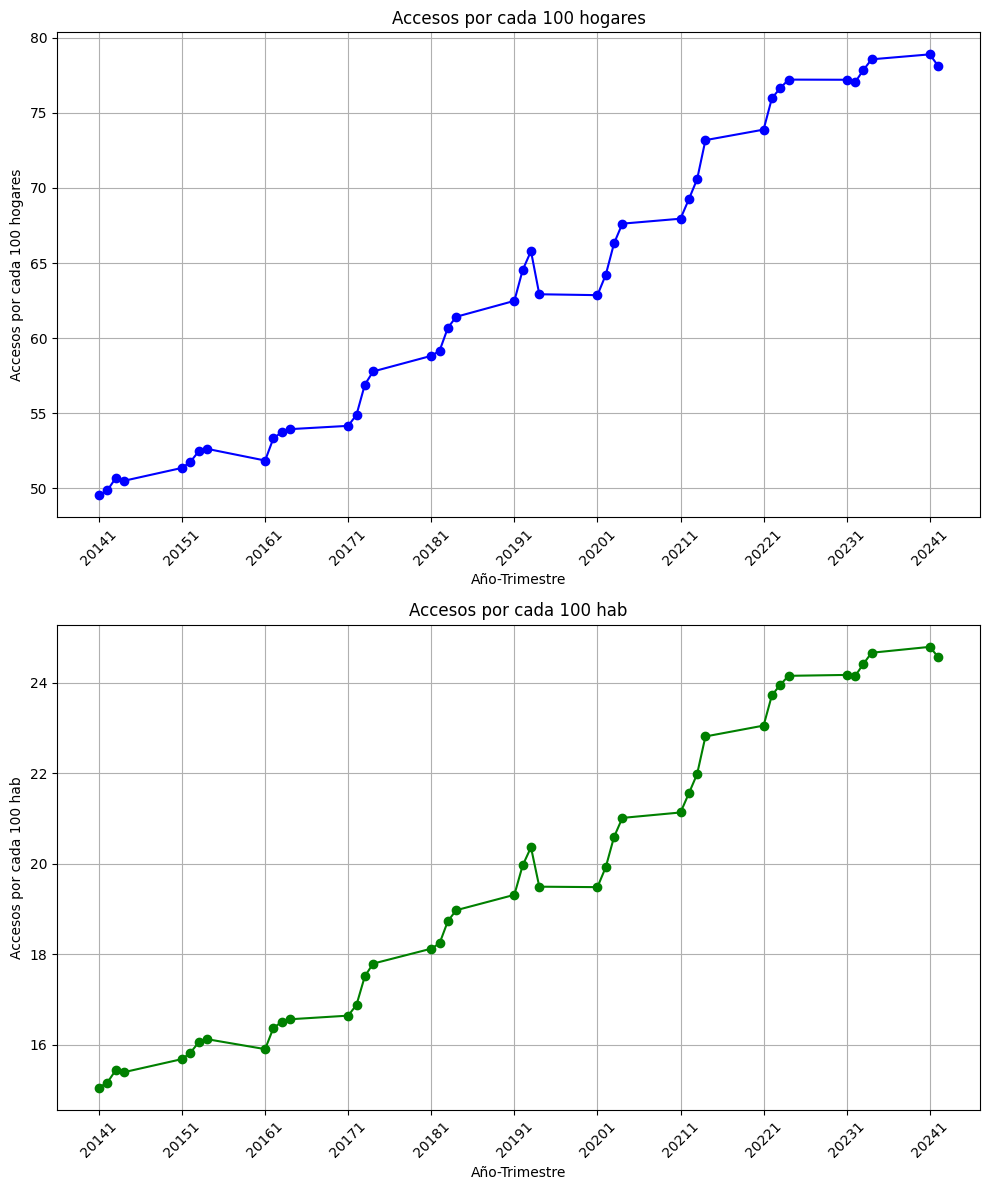

In [53]:
# Creamos la nueva columna 'Año-Trimestre'
pen_total1['Año-Trimestre'] = pen_total1['Año'].astype(str) + pen_total1['Trimestre'].astype(str)

# Convertir la nueva columna a tipo numérico 
pen_total1['Año-Trimestre'] = pen_total1['Año-Trimestre'].astype(int)

#Agrupamos por 'Año-Trimestre' y sumar los valores de ambas columnas
pen_total1_agrupado = pen_total1.groupby('Año-Trimestre')[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].sum()

# Crear dos gráficos de línea separados
fig, ax = plt.subplots(2, 1, figsize=(10, 12))  # Dos filas, una columna

# Gráfico 1: 'Accesos por cada 100 hogares'
ax[0].plot(pen_total1_agrupado.index, pen_total1_agrupado['Accesos por cada 100 hogares'], marker='o', linestyle='-', color='b')
ax[0].set_title('Accesos por cada 100 hogares')
ax[0].set_xlabel('Año-Trimestre')
ax[0].set_ylabel('Accesos por cada 100 hogares')
ax[0].grid(True)

# Gráfico 2: 'Accesos por cada 100 hab'
ax[1].plot(pen_total1_agrupado.index, pen_total1_agrupado['Accesos por cada 100 hab'], marker='o', linestyle='-', color='g')
ax[1].set_title('Accesos por cada 100 hab')
ax[1].set_xlabel('Año-Trimestre')
ax[1].set_ylabel('Accesos por cada 100 hab')
ax[1].grid(True)

# Obtener solo las etiquetas correspondientes al primer trimestre de cada año
# Aquí se extraen los valores de 'Año' de los primeros trimestres de cada año
xticks = sorted(set([int(str(x)[:4] + '1') for x in pen_total1_agrupado.index]))  # Año + 1

# Establecer los ticks del eje X para que solo muestren los primeros trimestres de cada año
for axis in ax:
    axis.set_xticks(xticks)
    axis.set_xticklabels([str(x) for x in xticks])  # Convertir los valores a cadenas si es necesario
    axis.tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje X para mayor legibilidad


# Ajustar la visualización
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Como puede verse, ambas gráficas son casi iguales si lo analizamos de forma relativa a su respectiva escala. Esto tiene sentido, ya que ambas deberían medir el mismo crecimiento desde un marco de referencia distinto. 

In [54]:
pen_total1.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Año-Trimestre
0,2024,2,78.13,24.57,20242
1,2024,1,78.89,24.79,20241
2,2023,4,78.56,24.66,20234
3,2023,3,77.84,24.41,20233
4,2023,2,77.02,24.14,20232


In [55]:
pen_total1.to_csv('./Database/Tablas_de_hecho/Penetracion_total.csv',index=False, decimal=',')

<u>ACCESO TOTAL POR RANGO</u>

In [56]:
acc_total_rang3=acc_total_rang.copy()
acc_total_rang3.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,2,28151,67024,840200,911374,662649,348253,8357088,341368,11556107
1,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
2,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
3,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
4,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897


In [57]:
acc_total_rang3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      42 non-null     int64
 1   Trimestre                42 non-null     int64
 2   Hasta 512 kbps           42 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  42 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    42 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   42 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  42 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  42 non-null     int64
 8   Más de 30 Mbps           42 non-null     int64
 9   OTROS                    42 non-null     int64
 10  Total                    42 non-null     int64
dtypes: int64(11)
memory usage: 3.7 KB


Renombramos algunas columnas

In [58]:
acc_total_rang3=acc_total_rang3.rename(columns={"Hasta 512 kbps":"Menos 0.512 Mb/s",
                                                "Entre 512 Kbps y 1 Mbps":"[0.512 , 1] Mb/s",
                                                "Entre 1 Mbps y 6 Mbps":"[1 , 6] Mb/s",
                                                "Entre 6 Mbps y 10 Mbps":"[6 , 10] Mb/s",
                                                "Entre 10 Mbps y 20 Mbps":"[10 , 20] Mb/s",
                                                "Entre 20 Mbps y 30 Mbps":"[20 , 30] Mb/s",
                                                "Más de 30 Mbps":"Más 30 Mb/s",
                                                "OTROS":"Otros"})

Hagamos una linea histórica de las mismas características que antes para cada rango de velocidad.

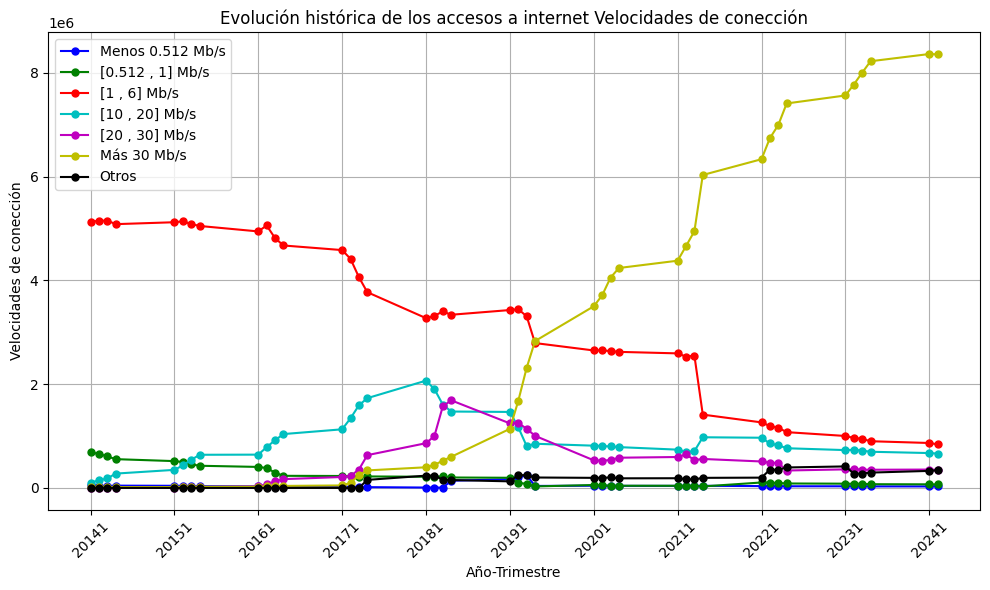

In [59]:
acc_total_rang3['Año-Trimestre'] = acc_total_rang3['Año'].astype(str) + acc_total_rang3['Trimestre'].astype(str)

acc_total_rang3['Año-Trimestre'] = acc_total_rang3['Año-Trimestre'].astype(int)

acc_total_rang3_agrupado = acc_total_rang3.groupby('Año-Trimestre')[['Menos 0.512 Mb/s','[0.512 , 1] Mb/s','[1 , 6] Mb/s','[10 , 20] Mb/s',
                                                                     '[20 , 30] Mb/s','Más 30 Mb/s','Otros']].sum()
punto=5

plt.figure(figsize=(10, 6))

plt.plot(acc_total_rang3_agrupado.index, acc_total_rang3_agrupado['Menos 0.512 Mb/s'], marker='o', linestyle='-', label='Menos 0.512 Mb/s', color='b',markersize=punto)
plt.plot(acc_total_rang3_agrupado.index, acc_total_rang3_agrupado['[0.512 , 1] Mb/s'], marker='o', linestyle='-', label='[0.512 , 1] Mb/s', color='g',markersize=punto)
plt.plot(acc_total_rang3_agrupado.index, acc_total_rang3_agrupado['[1 , 6] Mb/s'], marker='o', linestyle='-', label='[1 , 6] Mb/s', color='r',markersize=punto)
plt.plot(acc_total_rang3_agrupado.index, acc_total_rang3_agrupado['[10 , 20] Mb/s'], marker='o', linestyle='-', label='[10 , 20] Mb/s', color='c',markersize=punto)
plt.plot(acc_total_rang3_agrupado.index, acc_total_rang3_agrupado['[20 , 30] Mb/s'], marker='o', linestyle='-', label='[20 , 30] Mb/s', color='m',markersize=punto)
plt.plot(acc_total_rang3_agrupado.index, acc_total_rang3_agrupado['Más 30 Mb/s'], marker='o', linestyle='-', label='Más 30 Mb/s', color='y',markersize=punto)
plt.plot(acc_total_rang3_agrupado.index, acc_total_rang3_agrupado['Otros'], marker='o', linestyle='-', label='Otros', color='k',markersize=punto)

# Etiquetas y título
plt.xlabel('Año-Trimestre')
plt.ylabel('Velocidades de conección')
plt.title('Evolución histórica de los accesos a internet Velocidades de conección')
plt.xticks(rotation=45) 

xticks = sorted(set([int(str(x)[:4] + '1') for x in acc_total_rang3_agrupado.index]))
plt.xticks(xticks, [str(x) for x in xticks], rotation=45)

plt.grid(True)

# Mostrar la leyenda
plt.legend()

# Ajuste de la visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Con una vista general podemos ver que los accesos a las volidades del rango [1,6] han disminuído de forma muy brusca a lo largo de los años, miestras que los del rango "Mas 30" han aumentado en gran medida. Esto tiene sentido ya que, con el correr de los años, la estructura tecnológica de las ciudades tambien ha aumentado, lo que puede haber facilitado el acceso a mayores velocidades de conección para todo el público. Esto tambíen explicaría el periodo de crecimiento de los rangos de velocidades [10,20] y [20,30] y que su periodo de mayor caida coincida con el de mayor crecimiento del "Mas 30". El resto de rangos de velocidades, en general han terminado con mayores accesos de los que comenzaron, pero su variación no ha sido tan destacable.

In [60]:
acc_total_rang3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Año               42 non-null     int64
 1   Trimestre         42 non-null     int64
 2   Menos 0.512 Mb/s  42 non-null     int64
 3   [0.512 , 1] Mb/s  42 non-null     int64
 4   [1 , 6] Mb/s      42 non-null     int64
 5   [6 , 10] Mb/s     42 non-null     int64
 6   [10 , 20] Mb/s    42 non-null     int64
 7   [20 , 30] Mb/s    42 non-null     int64
 8   Más 30 Mb/s       42 non-null     int64
 9   Otros             42 non-null     int64
 10  Total             42 non-null     int64
 11  Año-Trimestre     42 non-null     int64
dtypes: int64(12)
memory usage: 4.1 KB


In [61]:
acc_total_rang3.to_csv('./Database/Tablas_de_hecho/Acceso_total_por_rango.csv',index=False, decimal=',')

<u>ACCESO POR RANGO</u>

In [62]:
acc_rang1=acc_rang.copy()
acc_rang1.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0


In [63]:
acc_rang1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                994 non-null    float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB


¿Qué podemos hacer con los NaN de la columna OTROS?

In [64]:
nan = acc_rang1[acc_rang1['OTROS'].isna()]
print(nan["HASTA 512 kbps"]+nan["+ 512 Kbps - 1 Mbps"]+nan["+ 1 Mbps - 6 Mbps"]+nan["+ 6 Mbps - 10 Mbps"]+nan["+ 10 Mbps - 20 Mbps"]+
      nan["+ 20 Mbps - 30 Mbps"]+nan["+ 30 Mbps"]-nan["Total"])

481    0.0
491    0.0
492    0.0
499    0.0
502    0.0
503    0.0
dtype: float64


Como se puede ver, si sumamos toas las columnas menos OTROS, para las filas que tienen nulos allí, el resultado es la columna Total. Por lo que podemos reemplazar los NaN de OTROS por ceros

In [65]:
acc_rang1.fillna(0,inplace=True)

In [66]:
acc_rang1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                1000 non-null   float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB


Renombramos algunas columnas

In [67]:
acc_rang1=acc_rang1.rename(columns={"HASTA 512 kbps":"Menos 0.512 Mb/s",
                                    "+ 512 Kbps - 1 Mbps":"[0.512 , 1] Mb/s",
                                    "+ 1 Mbps - 6 Mbps":"[1 , 6] Mb/s",
                                    "+ 6 Mbps - 10 Mbps":"[6 , 10] Mb/s",
                                    "+ 10 Mbps - 20 Mbps":"[10 , 20] Mb/s",
                                    "+ 20 Mbps - 30 Mbps":"[20 , 30] Mb/s",
                                    "+ 30 Mbps":"Más 30 Mb/s",
                                    "OTROS":"Otros"})

In [68]:
acc_rang1['Año-Trimestre'] = acc_rang1['Año'].astype(str) + acc_rang1['Trimestre'].astype(str)
acc_rang1['Año-Trimestre'] = acc_rang1['Año-Trimestre'].astype(int)

Normalizamos el formato de texto en la columna Provincias, traemos la columna Id_Provinvias y eliminamos la anterior

In [69]:
acc_rang1.loc[:, "Provincia"]=acc_rang1["Provincia"].apply(normalizacion_palabras)
acc_rang1["Provincia"] = acc_rang1["Provincia"].replace("Ciudad Autonoma de Buenos Aires", "Caba")
acc_rang1["Provincia"] = acc_rang1["Provincia"].replace("Capital Federal", "Caba")
acc_rang1 = acc_rang1.merge(provincias[["Provincia", "Id_Provincia"]], left_on="Provincia", right_on="Provincia", how="left")
acc_rang2=acc_rang1.drop(columns="Provincia")

In [70]:
acc_rang2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1000 non-null   int64  
 1   Trimestre         1000 non-null   int64  
 2   Menos 0.512 Mb/s  1000 non-null   float64
 3   [0.512 , 1] Mb/s  1000 non-null   float64
 4   [1 , 6] Mb/s      1000 non-null   float64
 5   [6 , 10] Mb/s     1000 non-null   float64
 6   [10 , 20] Mb/s    1000 non-null   float64
 7   [20 , 30] Mb/s    1000 non-null   float64
 8   Más 30 Mb/s       1000 non-null   float64
 9   Otros             1000 non-null   float64
 10  Total             1000 non-null   float64
 11  Año-Trimestre     1000 non-null   int64  
 12  Id_Provincia      1000 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 101.7 KB


In [71]:
for column in acc_rang2.columns:
    acc_rang2[column]=acc_rang2[column].astype(int)

Para el año 2014, primer trimestre, solo hay info hasta la provincia con Id_Provincia=16. Rellenaremos los valores faltantes de cada columna con el promedio correspondiente a los valores dentro de ese año y trimestre correspondiente a cada columna.

In [72]:
dicc={"Año":[2014 for i in range(8)],
      "Trimestre":[1 for i in range(8)],
      "Menos 0.512 Mb/s":[round(acc_rang2.loc[999-15:999,"Menos 0.512 Mb/s"].mean(),2) for i in range(8)],
      "[0.512 , 1] Mb/s":[round(acc_rang2.loc[999-15:999,"[0.512 , 1] Mb/s"].mean(),2) for i in range(8)],
      "[1 , 6] Mb/s":[round(acc_rang2.loc[999-15:999,"[1 , 6] Mb/s"].mean(),2) for i in range(8)],
      "[6 , 10] Mb/s":[round(acc_rang2.loc[999-15:999,"[6 , 10] Mb/s"].mean(),2) for i in range(8)],
      "[10 , 20] Mb/s":[round(acc_rang2.loc[999-15:999,"[10 , 20] Mb/s"].mean(),2) for i in range(8)],
      "[20 , 30] Mb/s":[round(acc_rang2.loc[999-15:999,"[20 , 30] Mb/s"].mean(),2) for i in range(8)],
      "Más 30 Mb/s":[round(acc_rang2.loc[999-15:999,"Más 30 Mb/s"].mean(),2) for i in range(8)],
      "Otros":[round(acc_rang2.loc[999-15:999,"Otros"].mean(),2) for i in range(8)],
      "Total":[round(acc_rang2.loc[999-15:999,"Total"].mean(),2) for i in range(8)],
      "Año-Trimestre":[20141 for i in range(8)],
      "Id_Provincia":[i for i in range(17,25)]}
df=pd.DataFrame(dicc)
acc_rang3=pd.concat([acc_rang2, df], ignore_index=True)
acc_rang3

,Año,Trimestre,Menos 0.512 Mb/s,"[0.512 , 1] Mb/s","[1 , 6] Mb/s","[6 , 10] Mb/s","[10 , 20] Mb/s","[20 , 30] Mb/s",Más 30 Mb/s,Otros,Total,Año-Trimestre,Id_Provincia
0,2024,2,25287.0,23034.00,222627.00,221660.00,244528.00,106302.00,4020395.00,125547.0,4989380.00,20242,2
1,2024,2,518.0,4122.00,24539.00,40296.00,33158.00,5633.00,1355333.00,0.0,1463599.00,20242,1
2,2024,2,72.0,164.00,2660.00,3093.00,3799.00,1279.00,63954.00,53.0,75074.00,20242,3
3,2024,2,236.0,349.00,14594.00,8336.00,6208.00,6454.00,107707.00,3208.0,147092.00,20242,4
4,2024,2,125.0,1139.00,43699.00,31971.00,22696.00,19827.00,38212.00,16554.0,174223.00,20242,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2014,1,2639.0,31002.06,280969.19,15465.81,5843.38,19.88,682.81,0.0,336622.31,20141,20
1004,2014,1,2639.0,31002.06,280969.19,15465.81,5843.38,19.88,682.81,0.0,336622.31,20141,21
1005,2014,1,2639.0,31002.06,280969.19,15465.81,5843.38,19.88,682.81,0.0,336622.31,20141,22
1006,2014,1,2639.0,31002.06,280969.19,15465.81,5843.38,19.88,682.81,0.0,336622.31,20141,23


In [73]:
acc_rang3.to_csv('./Database/Tablas_de_hecho/Acceso_por_rango.csv',index=False, decimal=',')

<u>TOTAL_DIAL-BAF</u>

In [74]:
dial_baf_tot1=dial_baf_tot.copy()
dial_baf_tot1.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2024,2,11544314,11793,11556107,Abr-Jun 2024
1,2024,1,11621363,11793,11633156,Ene-Mar 2024
2,2023,4,11535868,11793,11547661,Oct-Dic 2023
3,2023,3,11395115,11793,11406908,Jul-Sept 2023
4,2023,2,11239781,12116,11251897,Abr-Jun 2023


In [75]:
dial_baf_tot1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               42 non-null     int64 
 1   Trimestre         42 non-null     int64 
 2   Banda ancha fija  42 non-null     int64 
 3   Dial up           42 non-null     int64 
 4   Total             42 non-null     int64 
 5   Periodo           42 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.1+ KB


La columna Periodo es irrelevante y ya está en la tabla de dimension Trimestre

In [76]:
dial_baf_tot1=dial_baf_tot1.drop(columns="Periodo")

Analizamos una linea histórica de los accesos

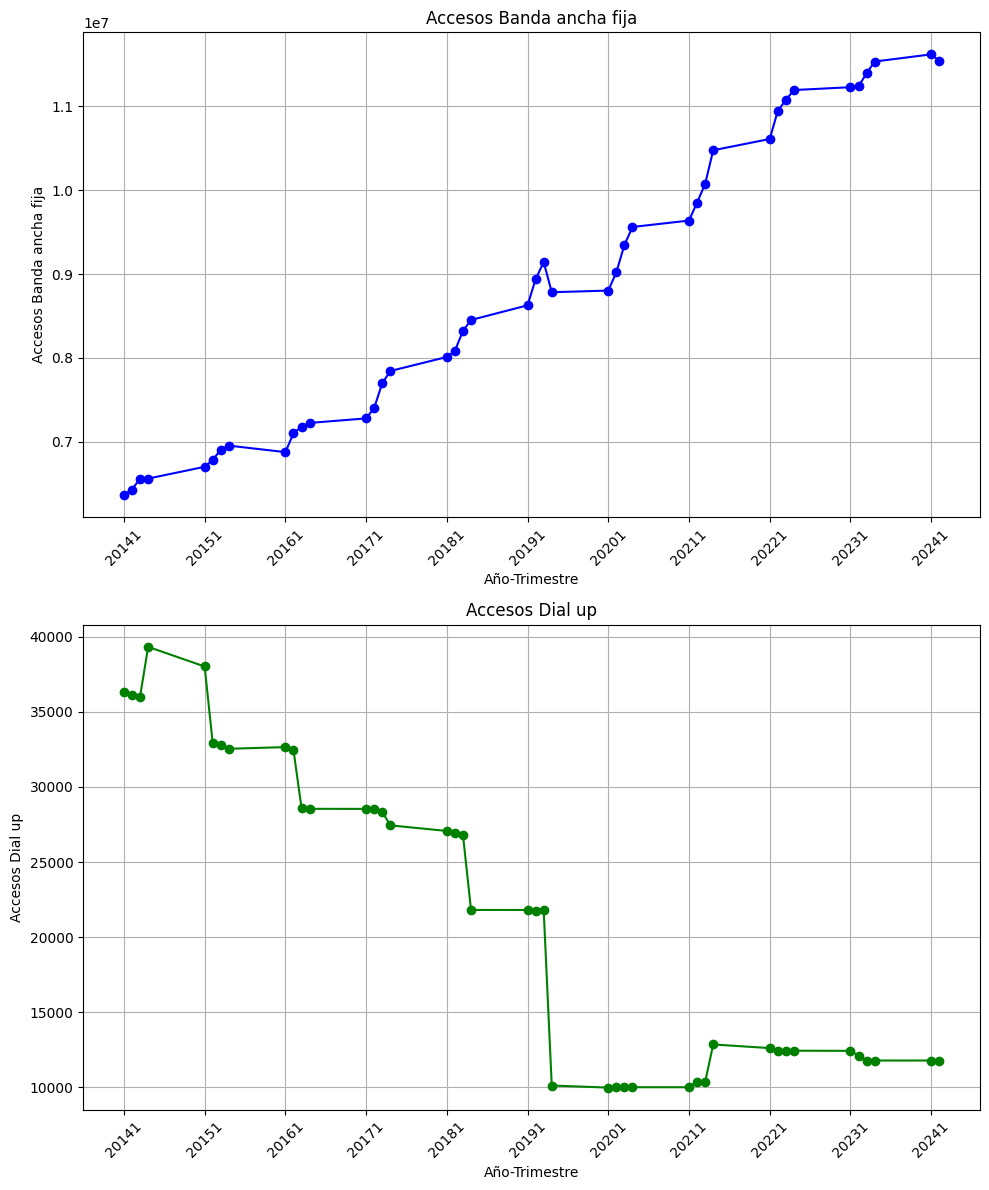

In [77]:
# Creamos la nueva columna 'Año-Trimestre'
dial_baf_tot1['Año-Trimestre'] = dial_baf_tot1['Año'].astype(str) + dial_baf_tot1['Trimestre'].astype(str)

# Convertir la nueva columna a tipo numérico 
dial_baf_tot1['Año-Trimestre'] = dial_baf_tot1['Año-Trimestre'].astype(int)

#Agrupamos por 'Año-Trimestre' y sumar los valores de ambas columnas
dial_baf_tot1_agrupado = dial_baf_tot1.groupby('Año-Trimestre')[['Banda ancha fija', 'Dial up']].sum()

# Crear dos gráficos de línea separados
fig, ax = plt.subplots(2, 1, figsize=(10, 12))  # Dos filas, una columna

# Gráfico 1: 'Accesos por cada 100 hogares'
ax[0].plot(dial_baf_tot1_agrupado.index, dial_baf_tot1_agrupado['Banda ancha fija'], marker='o', linestyle='-', color='b')
ax[0].set_title('Accesos Banda ancha fija')
ax[0].set_xlabel('Año-Trimestre')
ax[0].set_ylabel('Accesos Banda ancha fija')
ax[0].grid(True)

# Gráfico 2: 'Accesos por cada 100 hab'
ax[1].plot(dial_baf_tot1_agrupado.index, dial_baf_tot1_agrupado['Dial up'], marker='o', linestyle='-', color='g')
ax[1].set_title('Accesos Dial up')
ax[1].set_xlabel('Año-Trimestre')
ax[1].set_ylabel('Accesos Dial up')
ax[1].grid(True)

# Obtener solo las etiquetas correspondientes al primer trimestre de cada año
# Aquí se extraen los valores de 'Año' de los primeros trimestres de cada año
xticks = sorted(set([int(str(x)[:4] + '1') for x in dial_baf_tot1_agrupado.index]))  # Año + 1

# Establecer los ticks del eje X para que solo muestren los primeros trimestres de cada año
for axis in ax:
    axis.set_xticks(xticks)
    axis.set_xticklabels([str(x) for x in xticks])  # Convertir los valores a cadenas si es necesario
    axis.tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje X para mayor legibilidad


# Ajustar la visualización
plt.tight_layout()

# Mostrar los gráficos
plt.show()

La conexión Dial up es una forma de acceso a Internet que utiliza una línea telefónica analógica para establecer una conexión con un proveedor de servicios de Internet. La concexión Banda ancha fija incluye conexiones DSL, redes de cable y fibra óptica, entre otras. Como Puede verse mientras la segunda a aumentado su número de accesos a lo largo de los años, la primera ha perdido muchos, teniendo una bajada drástica en el último trimestre del 2019. Esto puede deverse a que, con el aumento del uso del celular, se produjo una fuerte disminucion en el uso de teléfonos fijos y, por ende, en el uso de las cooperativas telefónicas que brindan internet (Dial up)

In [78]:
dial_baf_tot1.to_csv('./Database/Tablas_de_hecho/Total_Dial_Baf.csv',index=False, decimal=',')

<u>DIAL-BAF</u>

In [79]:
dial_baf1=dial_baf.copy()
dial_baf1.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2024,2,Buenos Aires,4983480,5900.0,4989380
1,2024,2,Capital Federal,1461549,2050.0,1463599
2,2024,2,Catamarca,75073,1.0,75074
3,2024,2,Chaco,147087,5.0,147092
4,2024,2,Chubut,173366,857.0,174223


In [80]:
dial_baf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1992 non-null   int64  
 1   Trimestre         1992 non-null   int64  
 2   Provincia         1992 non-null   object 
 3   Banda ancha fija  1992 non-null   int64  
 4   Dial up           1988 non-null   float64
 5   Total             1992 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.5+ KB


In [81]:
nan = dial_baf1[dial_baf1['Dial up'].isna()]
print(nan["Banda ancha fija"]-nan["Total"])

584     0
589     0
1568    0
1573    0
dtype: int64


Como se puede ver que, en las filas que la columna "Dial up" tiene NaN, Banda ancha fija = Total. Por lo que podemos reemplazar los NaN por ceros

In [82]:
dial_baf1.fillna(0,inplace=True)

Normalizamos el formato de texto en la columna Provincias, traemos la columna Id_Provinvias y eliminamos la anterior

In [83]:
dial_baf1.loc[:, "Provincia"]=dial_baf1["Provincia"].apply(normalizacion_palabras)
dial_baf1["Provincia"] = dial_baf1["Provincia"].replace("Ciudad Autonoma de Buenos Aires", "Caba")
dial_baf1["Provincia"] = dial_baf1["Provincia"].replace("Capital Federal", "Caba")
dial_baf1 = dial_baf1.merge(provincias[["Provincia", "Id_Provincia"]], left_on="Provincia", right_on="Provincia", how="left")
dial_baf2=dial_baf1.drop(columns="Provincia")

In [84]:
dial_baf2['Año-Trimestre'] = dial_baf2['Año'].astype(str) + dial_baf2['Trimestre'].astype(str)
dial_baf2['Año-Trimestre'] = dial_baf2['Año-Trimestre'].astype(int)

In [85]:
dial_baf2["Dial up"]=dial_baf2["Dial up"].astype(int)

In [86]:
dial_baf2.to_csv('./Database/Tablas_de_hecho/Dial_Baf.csv',index=False, decimal=',')

<u>INGRESOS</u>

In [87]:
Ingresos1=Ingresos.copy()
Ingresos1.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023


La columna Periodo es irrelevante y ya está en la tabla de dimension Trimestre

In [88]:
Ingresos1=Ingresos1.drop(columns="Periodo")

In [89]:
Ingresos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


Hagamos una linea histórica de los ingresos

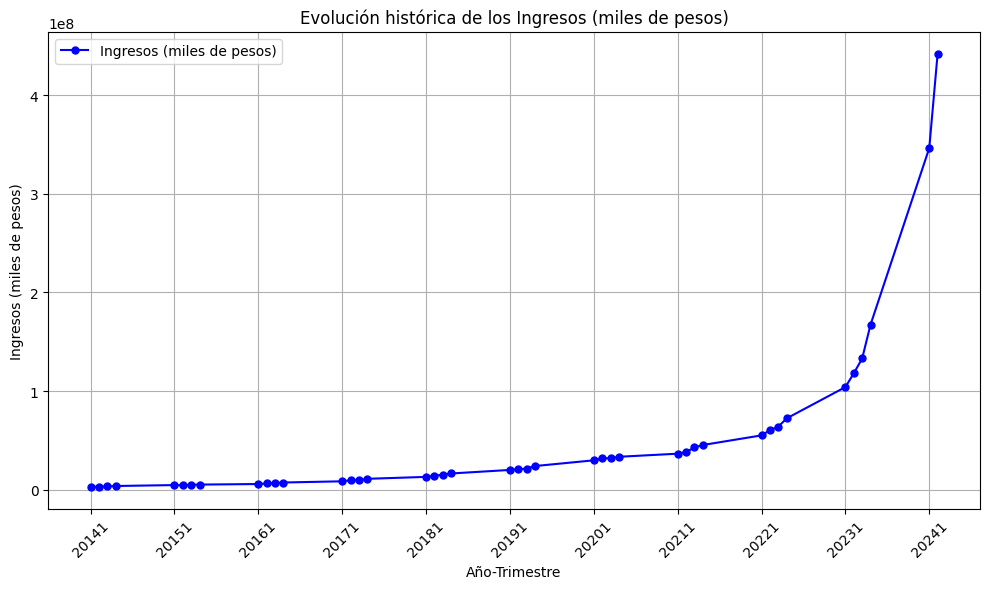

In [90]:
Ingresos1['Año-Trimestre'] = Ingresos1['Año'].astype(str) + Ingresos1['Trimestre'].astype(str)

Ingresos1['Año-Trimestre'] = Ingresos1['Año-Trimestre'].astype(int)

Ingresos1_agrupado = Ingresos1.groupby('Año-Trimestre')['Ingresos (miles de pesos)'].sum()
punto=5

plt.figure(figsize=(10, 6))

plt.plot(Ingresos1_agrupado.index, Ingresos1_agrupado, marker='o', linestyle='-', label='Ingresos (miles de pesos)', color='b',markersize=punto)

# Etiquetas y título
plt.xlabel('Año-Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Evolución histórica de los Ingresos (miles de pesos)')
plt.xticks(rotation=45) 

xticks = sorted(set([int(str(x)[:4] + '1') for x in Ingresos1_agrupado.index]))
plt.xticks(xticks, [str(x) for x in xticks], rotation=45)

plt.grid(True)

# Mostrar la leyenda
plt.legend()

# Ajuste de la visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Este grafico también tiene sentido 

En este caso vamos a redondear los números para que no tengan decimales, ya que hablamos de millones de pesos

In [91]:
Ingresos1["Ingresos (miles de pesos)"]=Ingresos1["Ingresos (miles de pesos)"].round()

In [92]:
Ingresos1.to_csv('./Database/Tablas_de_hecho/Ingresos.csv',index=False, decimal=',')

<u>VELOCIDAD SIN RANGOS</u>

In [93]:
vel_sinrang1=vel_sinrang.copy()
vel_sinrang1.head()

,Año,Trimestre,Provincia,Velocidad,Accesos
0,2024,2,BUENOS AIRES,75.0,1062
1,2024,2,BUENOS AIRES,59.0,59
2,2024,2,BUENOS AIRES,480.0,5
3,2024,2,BUENOS AIRES,3.5,41735
4,2024,2,BUENOS AIRES,18.0,1042


In [94]:
vel_sinrang1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        18884 non-null  int64  
 1   Trimestre  18884 non-null  int64  
 2   Provincia  18884 non-null  object 
 3   Velocidad  18874 non-null  float64
 4   Accesos    18884 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 737.8+ KB


Veamos los valores NaN

In [95]:
nan = vel_sinrang1[vel_sinrang1['Velocidad'].isna()]
print(nan)

        Año  Trimestre     Provincia  Velocidad  Accesos
1155   2024          1       Córdoba        NaN        1
1644   2024          1      Santa Fe        NaN        9
3753   2023          2       Córdoba        NaN        1
4239   2023          2      Santa Fe        NaN        9
6303   2022          3       Córdoba        NaN        1
6785   2022          3      Santa Fe        NaN        9
9255   2021          3  Buenos Aires        NaN        4
10031  2021          2  Buenos Aires        NaN        4
10794  2021          1  Buenos Aires        NaN        4
11538  2020          4  Buenos Aires        NaN        4


Tomaremos como que los valores cero de velocidad reprecentan una flata de informacion sobre este. Por lo que los NaN seran reemplazados por ceros 

In [96]:
vel_sinrang1.fillna(0,inplace=True)

In [97]:
vel_sinrang1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        18884 non-null  int64  
 1   Trimestre  18884 non-null  int64  
 2   Provincia  18884 non-null  object 
 3   Velocidad  18884 non-null  float64
 4   Accesos    18884 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 737.8+ KB


Normalicemos el formato de texto de la columna Provincia. Ademas traigamos la columna de Id_Provincia y eliminemos la columna Provincia 

In [98]:
vel_sinrang1.loc[:, "Provincia"]=vel_sinrang1["Provincia"].apply(normalizacion_palabras)
vel_sinrang1["Provincia"] = vel_sinrang1["Provincia"].replace("Ciudad Autonoma de Buenos Aires", "Caba")
vel_sinrang1["Provincia"] = vel_sinrang1["Provincia"].replace("Capital Federal", "Caba")
vel_sinrang1 = vel_sinrang1.merge(provincias[["Provincia", "Id_Provincia"]], left_on="Provincia", right_on="Provincia", how="left")
vel_sinrang2=vel_sinrang1.drop(columns="Provincia")

In [99]:
vel_sinrang2['Año-Trimestre'] = vel_sinrang2['Año'].astype(str) + vel_sinrang2['Trimestre'].astype(str)
vel_sinrang2['Año-Trimestre'] = vel_sinrang2['Año-Trimestre'].astype(int)

In [100]:
vel_sinrang2.to_csv('./Database/Tablas_de_hecho/Velocidad_sin_Rangos.csv',index=False, decimal=',')

<u>ACCESOS TECNOLOGÍA LOCALDAD</u>

In [101]:
Acc_tec_loc1=Acc_tec_loc.copy()
Acc_tec_loc1.head()

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,6854100,755.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,4600.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,6854100,742.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,6854100,727.0


In [102]:
Acc_tec_loc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Link Indec  7753 non-null   object 
 5   Accesos     7747 non-null   float64
dtypes: float64(1), object(5)
memory usage: 363.6+ KB


Vemos los NaN de Accesos

In [103]:
nan = Acc_tec_loc1[Acc_tec_loc1['Accesos'].isna()]
print(nan)

                Provincia     Partido         Localidad Tecnologia Link Indec  \
3755           CORRIENTES   Ituzaingó  Colonia Liebig's      Otros   18084010   
4101           ENTRE RIOS        Tala  Rosario del Tala      Otros   30091100   
5744                SALTA    Cafayate          Tolombón      Otros   66021020   
6005                SALTA  San Carlos           Animaná      Otros   66154020   
6010                SALTA  San Carlos        San Carlos      Otros   66154040   
7372  SANTIAGO DEL ESTERO       Choya             Frías      Otros   86063040   

      Accesos  
3755      NaN  
4101      NaN  
5744      NaN  
6005      NaN  
6010      NaN  
7372      NaN  


Como hicimos al principio, rellenaremos los NaN de Accesos con ceros

In [104]:
Acc_tec_loc1.fillna(0.0,inplace=True)

Eliminamos la columna de Link Indec, normalizamos el formato de texto de la columna Provincia, Partido y Localiad y, por último, traemos los Id's

In [105]:
Acc_tec_loc1.drop(columns="Link Indec",inplace=True)
# Normalizamos el formato del texto
Acc_tec_loc1.loc[:, "Provincia"]=Acc_tec_loc1["Provincia"].apply(normalizacion_palabras)
Acc_tec_loc1.loc[:, "Partido"]=Acc_tec_loc1["Partido"].apply(normalizacion_palabras)
Acc_tec_loc1.loc[:, "Localidad"]=Acc_tec_loc1["Localidad"].apply(normalizacion_palabras)
Acc_tec_loc1.loc[:, "Tecnologia"]=Acc_tec_loc1["Tecnologia"].apply(normalizacion_palabras)
Acc_tec_loc1[["Provincia","Partido","Localidad"]] = Acc_tec_loc1[["Provincia","Partido","Localidad"]].replace("Ciudad Autonoma de Buenos Aires", "Caba")
Acc_tec_loc1[["Provincia","Partido","Localidad"]] = Acc_tec_loc1[["Provincia","Partido","Localidad"]].replace("Capital Federal", "Caba")
# Traemos los Id's
Acc_tec_loc1 = Acc_tec_loc1.merge(provincias[["Provincia", "Id_Provincia"]], left_on="Provincia", right_on="Provincia", how="left")
Acc_tec_loc1 = Acc_tec_loc1.merge(partidos[["Partido", "Id_Partido"]], left_on="Partido", right_on="Partido", how="left")
Acc_tec_loc1 = Acc_tec_loc1.merge(localidades[["Localidad", "Id_Localidad"]], left_on="Localidad", right_on="Localidad", how="left")
Acc_tec_loc1 = Acc_tec_loc1.merge(tecnologias[["Tecnologia", "Id_Tecnologia"]], left_on="Tecnologia", right_on="Tecnologia", how="left")
# Eliminamos las columas
Acc_tec_loc2=Acc_tec_loc1.drop(columns=["Provincia","Partido","Localidad","Tecnologia"])
Acc_tec_loc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Accesos        7753 non-null   float64
 1   Id_Provincia   7753 non-null   int64  
 2   Id_Partido     7753 non-null   int64  
 3   Id_Localidad   7753 non-null   int64  
 4   Id_Tecnologia  7753 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 303.0 KB


In [106]:
Acc_tec_loc2["Accesos"]=Acc_tec_loc2["Accesos"].astype(int)

In [107]:
Acc_tec_loc2.to_csv('./Database/Tablas_de_hecho/Accesos_Tecnologia_Localidad.csv',index=False, decimal=',')

<u>VELOCIDAD % POR PROV</u>

In [108]:
vel_prov1=vel_prov.copy()
vel_prov1.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38
3,2024,2,Chaco,107.76
4,2024,2,Chubut,21.67


In [109]:
vel_prov1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


Normalicemos el formato de texto de la columna Provincia. Ademas traigamos la columna de Id_Provincia y eliminemos la columna Provincia 

In [110]:
vel_prov1['Año-Trimestre'] = vel_prov1['Año'].astype(str) + vel_prov1['Trimestre'].astype(str)
vel_prov1['Año-Trimestre'] = vel_prov1['Año-Trimestre'].astype(int)

In [111]:
vel_prov1.loc[:, "Provincia"]=vel_prov1["Provincia"].apply(normalizacion_palabras)
vel_prov1["Provincia"] = vel_prov1["Provincia"].replace("Ciudad Autonoma de Buenos Aires", "Caba")
vel_prov1["Provincia"] = vel_prov1["Provincia"].replace("Capital Federal", "Caba")
vel_prov1 = vel_prov1.merge(provincias[["Provincia", "Id_Provincia"]], left_on="Provincia", right_on="Provincia", how="left")
vel_prov2=vel_prov1.drop(columns="Provincia")
vel_prov2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Mbps (Media de bajada)  1008 non-null   float64
 3   Año-Trimestre           1008 non-null   int64  
 4   Id_Provincia            1008 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 39.5 KB


Hacemos que los números enteros, queden solo con dos cifras decimales.

In [112]:
vel_prov2["Mbps (Media de bajada)"]=vel_prov2["Mbps (Media de bajada)"].round(2)

In [113]:
vel_prov2.to_csv('./Database/Tablas_de_hecho/Velocidad_%_por_provincia.csv',index=False, decimal=',')

<u>TOTALES VMD</u>

In [114]:
vmd_tot1=vmd_tot.copy()
vmd_tot1.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,2,139.25,Abr-Jun 2024
1,2024,1,139.15,Ene-Mar 2024
2,2023,4,139.04,Oct-Dic 2023
3,2023,3,129.67,Jul-Sept 2023
4,2023,2,123.95,Abr-Jun 2023


In [115]:
vmd_tot1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     42 non-null     int64  
 1   Trimestre               42 non-null     int64  
 2   Mbps (Media de bajada)  42 non-null     float64
 3   Trimestre.1             42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [116]:
vmd_tot1.drop(columns="Trimestre.1",inplace=True)
vmd_tot1.columns

Index(['Año', 'Trimestre', 'Mbps (Media de bajada)'], dtype='object')

In [117]:
vmd_tot1['Año-Trimestre'] = vmd_tot1['Año'].astype(str) + vmd_tot1['Trimestre'].astype(str)
vmd_tot1['Año-Trimestre'] = vmd_tot1['Año-Trimestre'].astype(int)

Hacemos que los números enteros, queden solo con dos cifras decimales.

In [118]:
vmd_tot1["Mbps (Media de bajada)"]=vmd_tot1["Mbps (Media de bajada)"].round(2)

In [119]:
vmd_tot1.to_csv('./Database/Tablas_de_hecho/Totales_VMD.csv',index=False, decimal=',')

<u>TOTAL ACCESO POR TECNOLOGIA</u>

In [120]:
acc_total_tec1=acc_total_tec.copy()
acc_total_tec1.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


In [121]:
acc_total_tec1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB


In [122]:
acc_total_tec1=acc_total_tec1.rename(columns={"ADSL":"Adsl"})
acc_total_tec1.drop(columns="Periodo",inplace=True)

In [123]:
acc_total_tec1['Año-Trimestre'] = acc_total_tec1['Año'].astype(str) + acc_total_tec1['Trimestre'].astype(str)
acc_total_tec1['Año-Trimestre'] = acc_total_tec1['Año-Trimestre'].astype(int)

In [124]:
acc_total_tec1.to_csv('./Database/Tablas_de_hecho/Total_Acceso_por_Tecnologia.csv',index=False, decimal=',')

<u>TELEFONÍA FIJA</u>

In [125]:
Ingresos_tel_fij1=Ingresos_tel_fij.copy()
Ingresos_tel_fij1.head()

,Año,Trimestre,Ingresos (miles de $)
0,2014,1,2916071.754
1,2014,2,2974865.204
2,2014,3,3105462.022
3,2014,4,3339690.895
4,2015,1,3260124.752


In [126]:
Ingresos_tel_fij1['Año-Trimestre'] = Ingresos_tel_fij1['Año'].astype(str) + Ingresos_tel_fij1['Trimestre'].astype(str)
Ingresos_tel_fij1['Año-Trimestre'] = Ingresos_tel_fij1['Año-Trimestre'].astype(int)

In [127]:
Ingresos_tel_fij1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Año                    42 non-null     int64  
 1   Trimestre              42 non-null     int64  
 2   Ingresos (miles de $)  42 non-null     float64
 3   Año-Trimestre          42 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [128]:
Ingresos_tel_fij1.to_csv('./Database/Tablas_de_hecho/Telefonia_fija.csv',index=False, decimal=',')

<u>TELEFONÍA MOVIL</u>

In [129]:
Ingresos_tel_mov1=Ingresos_tel_mov.copy()
Ingresos_tel_mov1.head()

,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,13135235,Ene-Mar 2013
1,2013,2,13970806,Abr-Jun 2013
2,2013,3,15235659,Jul-Sept 2013
3,2013,4,16218846,Oct-Dic 2013
4,2014,1,15938353,Ene-Mar 2013


In [130]:
Ingresos_tel_mov1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Año                    46 non-null     int64 
 1   Trimestre              46 non-null     int64 
 2   Ingresos (miles de $)  46 non-null     int64 
 3   Periodo                46 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


In [131]:
Ingresos_tel_mov1.drop(columns="Periodo",inplace=True)
Ingresos_tel_mov1['Año-Trimestre'] = Ingresos_tel_mov1['Año'].astype(str) + Ingresos_tel_mov1['Trimestre'].astype(str)
Ingresos_tel_mov1['Año-Trimestre'] = Ingresos_tel_mov1['Año-Trimestre'].astype(int)

In [132]:
Ingresos_tel_mov1.to_csv('./Database/Tablas_de_hecho/Telefonia_movil.csv',index=False, decimal=',')